# The Sparks Foundation - Data Science and Business Analytics Internship

Name   : Madhukar Kambli

TASK  : Prediction using Supervised ML

Aim    : To Predict the percentage of marks of the students based on the number of hours they studied

In [74]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
#Loading the csv file with pandas library

df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#To show first 10 rows

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#To show last 5 rows

df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#used to print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
#used to view basic statistical details
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualising Data with Scatter plot

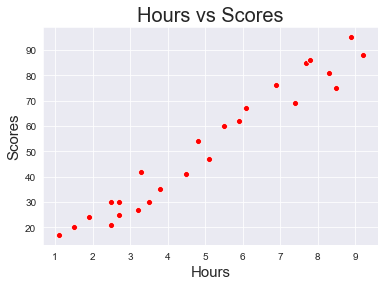

In [33]:
sns.set_style('darkgrid')
sns.scatterplot(df.Hours,df.Scores, color='red')
plt.xlabel('Hours', size=15)
plt.ylabel('Scores', size=15)
plt.title('Hours vs Scores', size=20)
plt.show()

## Spliting data into dependant and independant variables

In [7]:
X=df.iloc[:,:-1].values  #Independant values
y=df.iloc[:,1].values    #Dependant values

In [8]:
X.shape

(25, 1)

In [9]:
y.shape

(25,)

# Spliting data into training & testing data

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print('Spliting done....!')

Spliting done....!


In [11]:
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


In [12]:
print(y_train.shape)

(20,)


# Importing algorithm and training the model

In [14]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

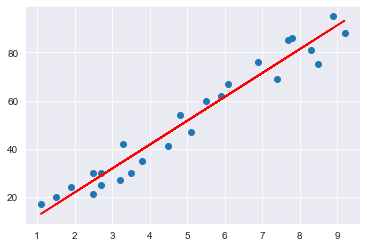

In [38]:
line = LR.coef_*X + LR.intercept_

plt.scatter(X, y)
plt.grid('darkgrid')
plt.plot(X, line, color='r')
plt.show()

## Predicting outcome on testing dataset

In [16]:
y_pred=LR.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [45]:
abc=pd.DataFrame({'actual value':y_test, 'predicted value':y_pred})
abc

,actual value,predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Predicting with new data

#### 1

In [27]:
#Giving new value to algorithm for prediction
Hour=[[9.25]]
own_pred = LR.predict(Hour)
print('If student does study for {a} hours, he can score {b}%'.format(a=Hour[0][0], b=own_pred[0]))

If student does study for 9.25 hours, he can score 93.69173248737538%


#### 2

In [72]:
new=pd.DataFrame({'hours2':[8.5,3,6,5,4,9,5.5]})
new

,hours2
0,8.5
1,3.0
2,6.0
3,5.0
4,4.0
5,9.0
6,5.5


In [67]:
z=new.iloc[:,0].values.reshape(-1,1)
z.shape

q=LR.predict(z)
q

array([86.25874013, 31.75012948, 61.48209893, 51.57144244, 41.66078596,
       91.21406837, 56.52677068])

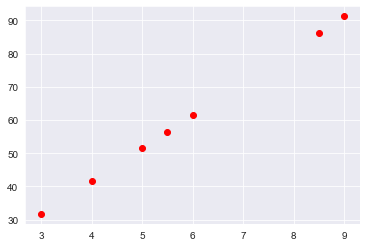

In [71]:
plt.scatter(z,q, color='r')
plt.show()

# Evaluation metrics

#### Mean absolute error

In [29]:
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error: ',a)

Mean absolute error:  4.183859899002975


#### R2 

In [32]:
print('The accuracy of model is: {}'.format(metrics.r2_score(y_test,y_pred)*100))

The accuracy of model is: 94.54906892105356
